# PA 2: Classification - Decision Tree

## Student Details (1 Point)

First Student Name and ID: Parimi Taraka Naga Nikhil 1001985955

Second Student Name and ID: Parimi Taraka Rama Akhil 1001980318

Third Student Name and ID: Jayadev Mandava 1002062733


Notes: When submitting, fill your name and ID in this cell.  [1 point]

Make sure to write about any 4-5 line to explain any kind of visualization

Do not to forget to cite any external sources used by you.

## Programming Assignment Details (7 Points)


For this assignment use Jupyter notebook, Panda, and scikit.

1) Load dataset_DT_NB.csv  [1 points]

### Features:

* Age | Objective Feature | age |
* Height | Objective Feature | height | 
* Weight | Objective Feature | weight | 
* Gender | Objective Feature | gender |  
* Systolic blood pressure | Examination Feature | ap_hi | 
* Diastolic blood pressure | Examination Feature | ap_lo | 
* Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
* Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
* Smoking | Subjective Feature | smoke | 
* Alcohol intake | Subjective Feature | alco | 
* Physical activity | Subjective Feature | active | 
* Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

All of the dataset values were collected at the moment of medical examination.

Split your dataset 75% for training, and 25% for testing the classifier.  [2 points]

In [1]:
# importing the important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score 
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import seaborn as sns


from sklearn.tree import export_graphviz
from sklearn.naive_bayes import GaussianNB
!pip install graphviz

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#1) Load dataset_DT_NB.csv  [1 points]
data=pd.read_csv('dataset_DT_NB.csv', delimiter=';')

In [4]:
# Displaying the data
data.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [5]:
# Split your dataset 75% for training, and 25% for testing the classifier.  [2 points]
X = data.loc[:, data.columns != 'cardio']
y = data['cardio']
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=2022)

data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## Extra points will be given for adequately explained preprocessing and high accuracy above 70%(up to 10 points)

### Hints - 

1) To compress the data, numerous columns might be combined into one feature.

2) Categorized Data is preferable for decision trees.

3) Unwanted data can reduce the model's accuracy.

# DecisionTree (15 Points)

1) Use gini and entropy to measure the quality of a split.  [2 points]

2) Use comments to explain your code and variable names. [1 point]

3) Determine four most influential attributes on target attribute (with explanation) [5 points]

3) Calculate and print the confusion matrix (use graphics instead showing a 2D array), and the classification Report (includes: precision, recall, f1-score, and support. [2 points]

4) Print the decision tree visualization with depth of 4, 5.  [5 points]

<AxesSubplot: >

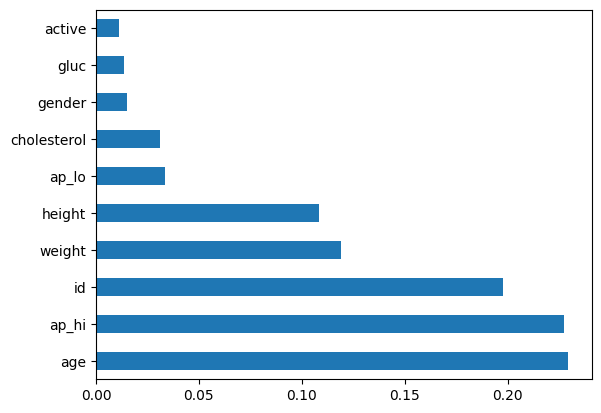

In [6]:
#1) Using gini to measure the quality of a split [2 points]

X = data.drop(['cardio'],axis=1)
y = data['cardio']
model = DecisionTreeClassifier(criterion='gini')
model.fit(X , y)
feature_imp = pd.Series(model.feature_importances_ , index = X.columns)
feature_imp.nlargest(10).plot(kind = 'barh')


<AxesSubplot: >

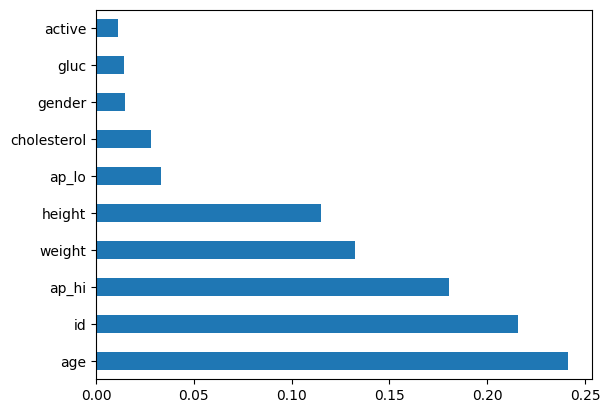

In [7]:
#1) Using entropy to measure the quality of a split [2 points]

X = data.drop(['cardio'],axis=1)
y = data['cardio']
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X , y)
feature_imp = pd.Series(model.feature_importances_ , index = X.columns)
feature_imp.nlargest(10).plot(kind = 'barh')


In [8]:
#3) Determine four most influential attributes on target attribute [5 points]
data.corr()['cardio']

id             0.003799
age            0.238159
gender         0.008109
height        -0.010821
weight         0.181660
ap_hi          0.054475
ap_lo          0.065719
cholesterol    0.221147
gluc           0.089307
smoke         -0.015486
alco          -0.007330
active        -0.035653
cardio         1.000000
Name: cardio, dtype: float64

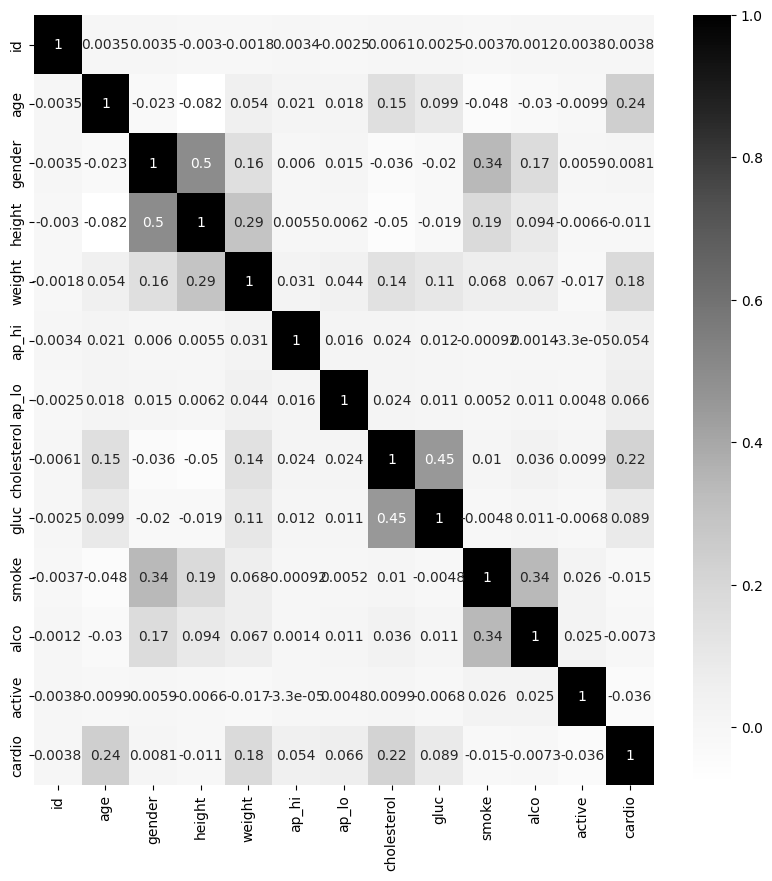

In [9]:
# predicting and finding the correlation matrix
data.corr()['cardio']
plt.figure(figsize=(10,10))
correaltion = data.corr()
sns.heatmap(correaltion, annot=True, cmap=plt.cm.Greys)
plt.show()

Accuracy: 0.7273142857142857


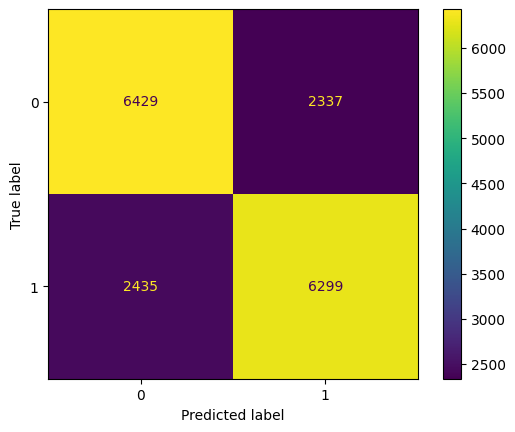

              precision    recall  f1-score   support

           0       0.73      0.73      0.73      8766
           1       0.73      0.72      0.73      8734

    accuracy                           0.73     17500
   macro avg       0.73      0.73      0.73     17500
weighted avg       0.73      0.73      0.73     17500



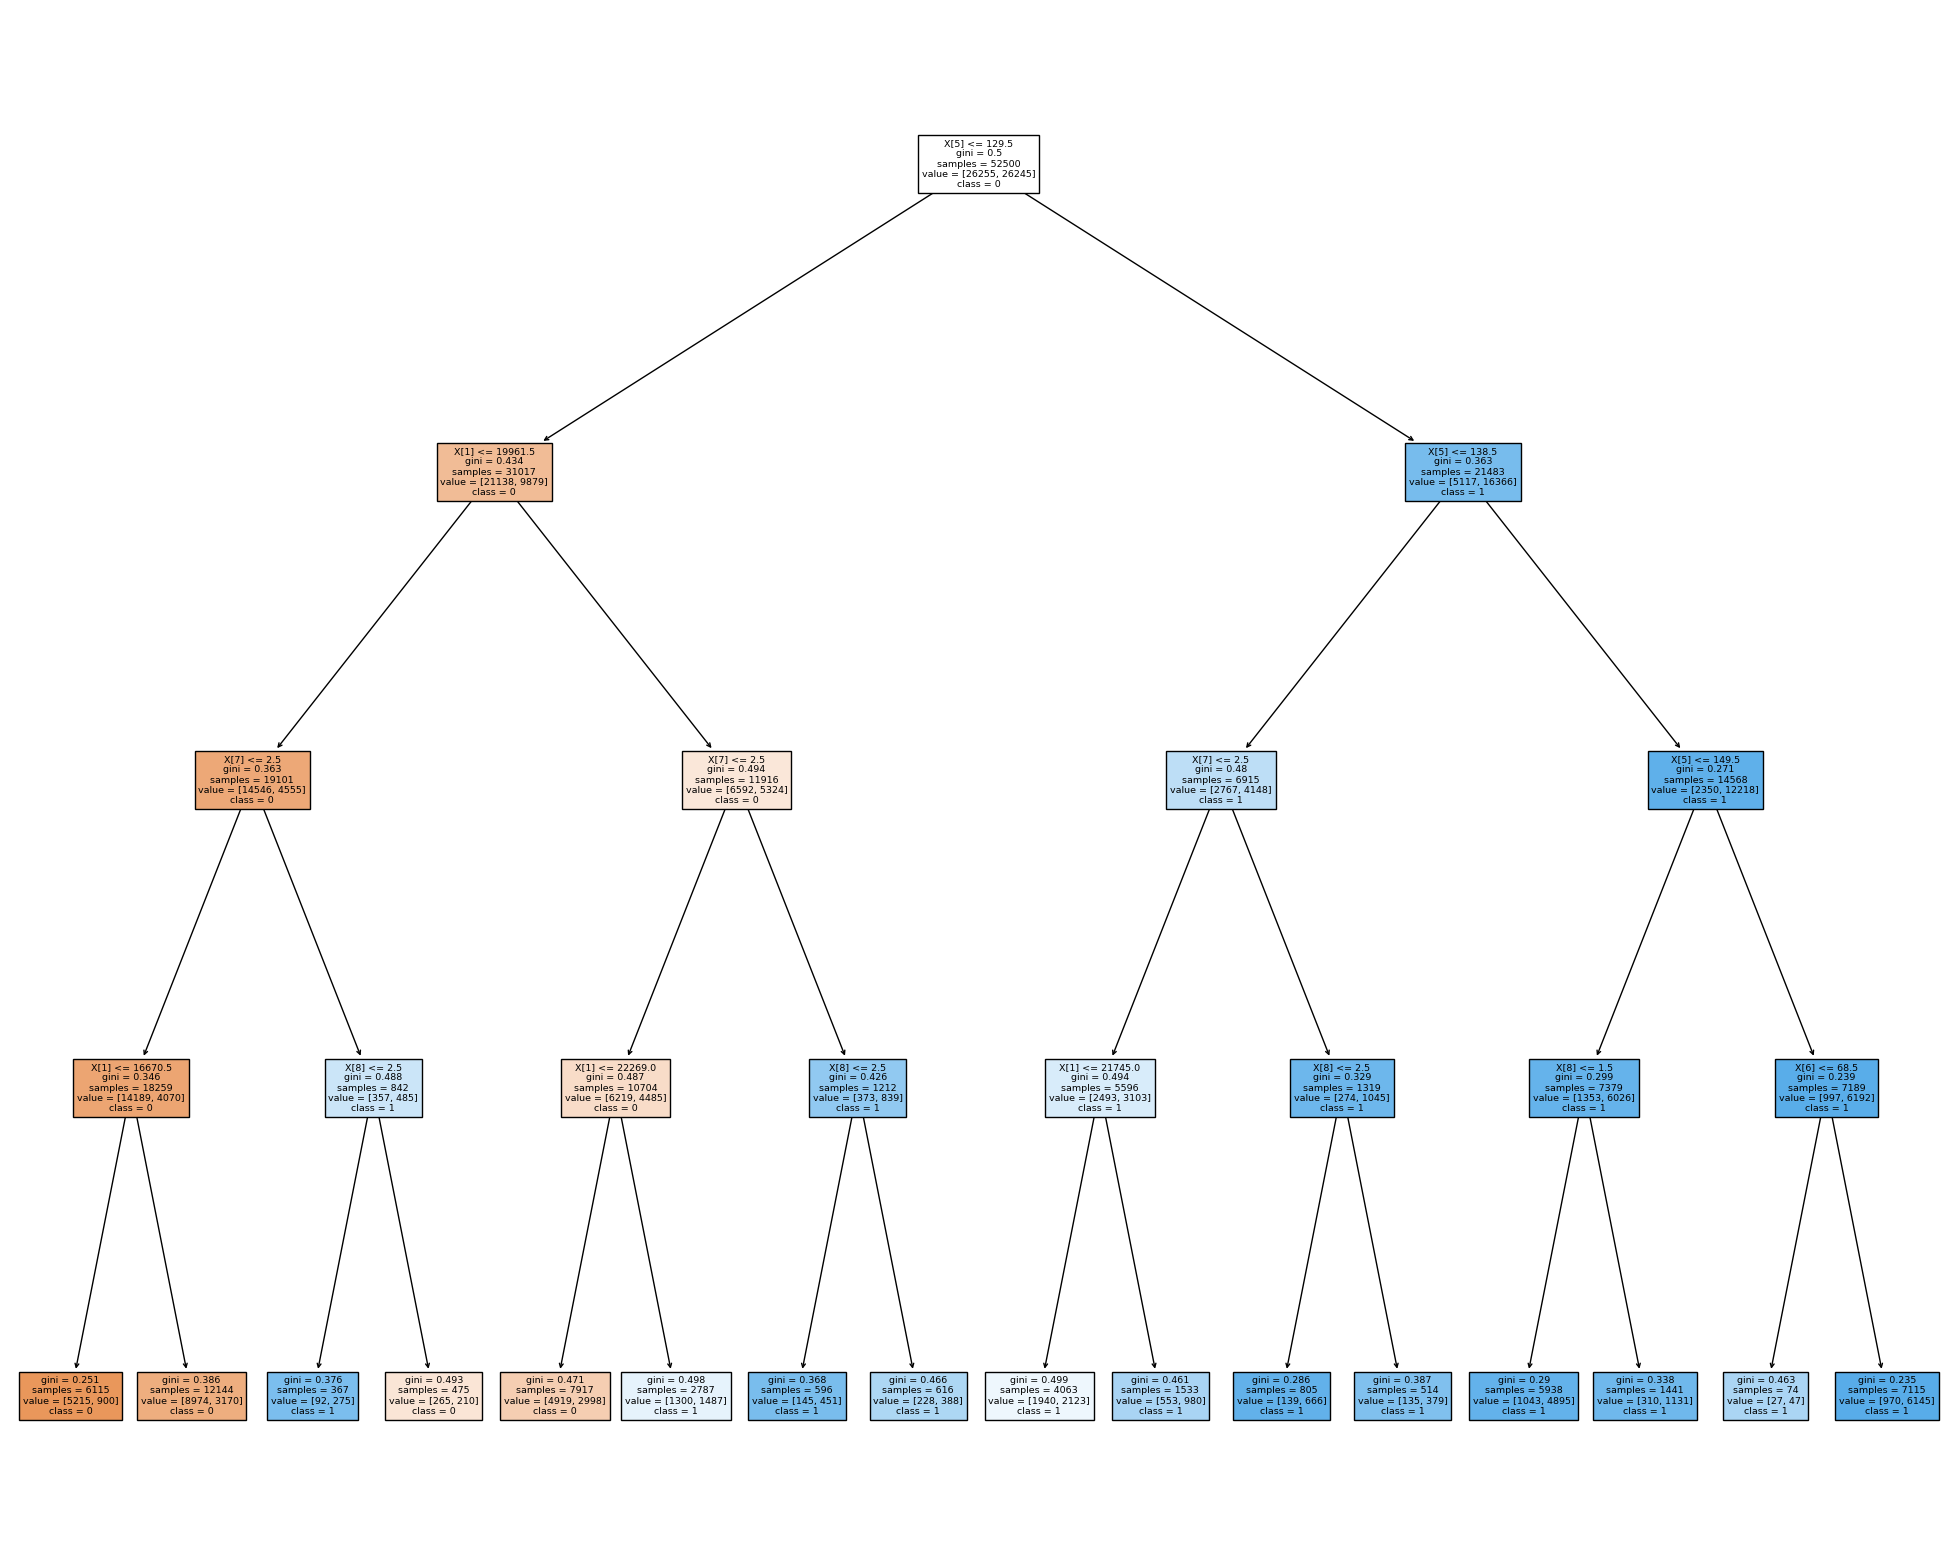

In [10]:
# 4) Calculate and print the confusion matrix of gini (use graphics instead showing a 2D array), and the classification Report (includes: precision, recall, f1-score, and support. [2 points] 
# 5) Print the decision tree visualization of gini with depth of 4.  [5 points]
dec_tree1 = DecisionTreeClassifier(criterion='gini', max_depth=4)
dec_tree1 = dec_tree1.fit(train_X,train_y)
predictions = dec_tree1.predict(test_X)
print('Accuracy:',metrics.accuracy_score(test_y, predictions))
plot_confusion_matrix(dec_tree1, test_X, test_y)  
plt.show()
print(classification_report(test_y,predictions))
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dec_tree1,class_names=list(map(str,data['cardio'].values)),
                   filled=True)

Accuracy: 0.7297714285714286


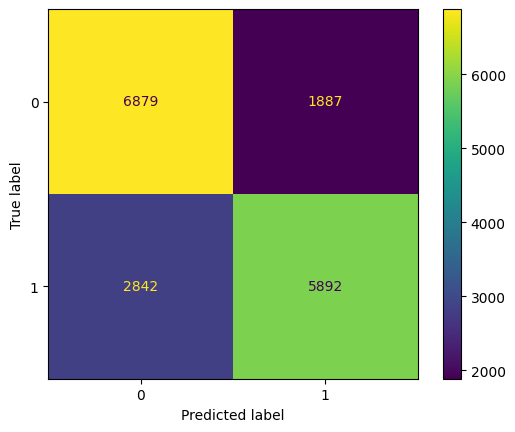

              precision    recall  f1-score   support

           0       0.71      0.78      0.74      8766
           1       0.76      0.67      0.71      8734

    accuracy                           0.73     17500
   macro avg       0.73      0.73      0.73     17500
weighted avg       0.73      0.73      0.73     17500



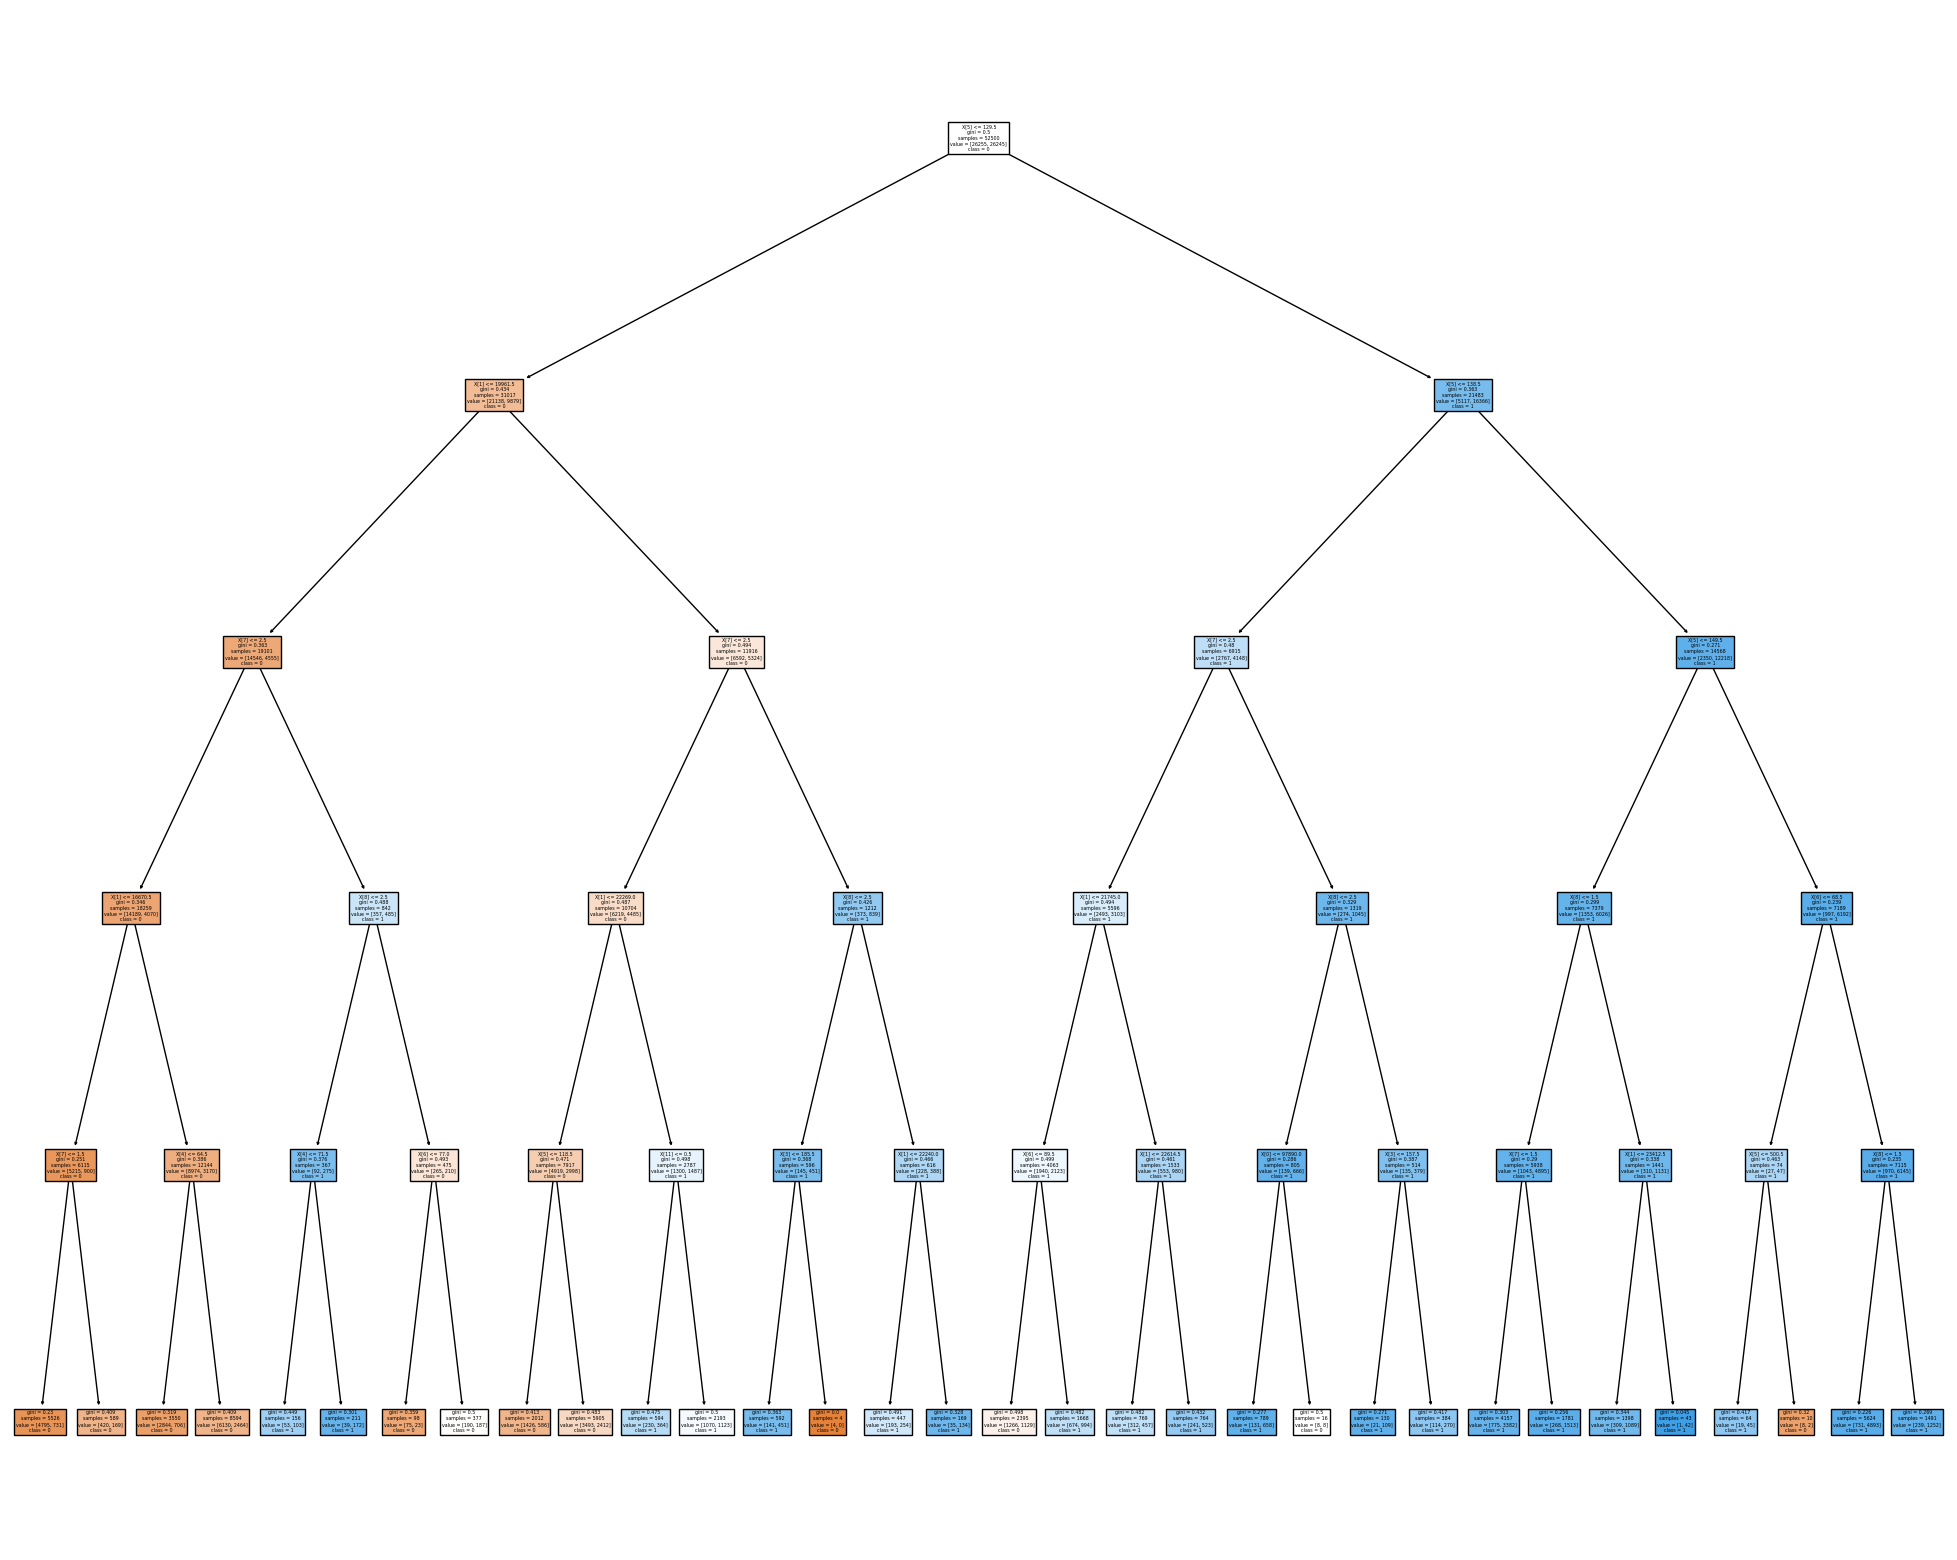

In [11]:
# 4) Calculate and print the confusion matrix of gini (use graphics instead showing a 2D array), and the classification Report (includes: precision, recall, f1-score, and support. [2 points] 
# 5) Print the decision tree visualization of gini with depth of 5.  [5 points]
dec_tree1 = DecisionTreeClassifier(criterion='gini', max_depth=5)
dec_tree1 = dec_tree1.fit(train_X,train_y)
predictions = dec_tree1.predict(test_X)
print('Accuracy:',metrics.accuracy_score(test_y, predictions))
plot_confusion_matrix(dec_tree1, test_X, test_y)  
plt.show()
print(classification_report(test_y,predictions))
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dec_tree1,class_names=list(map(str,data['cardio'].values)),
                   filled=True)

Accuracy: 0.7273142857142857


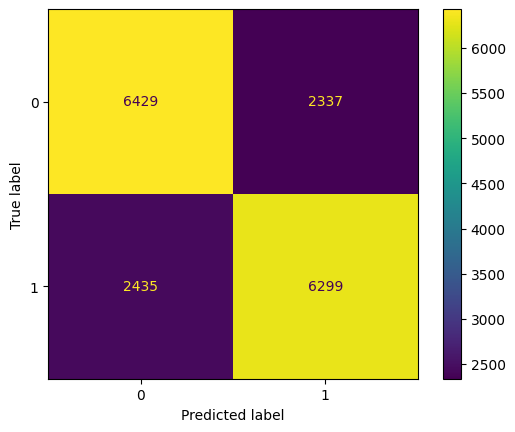

              precision    recall  f1-score   support

           0       0.73      0.73      0.73      8766
           1       0.73      0.72      0.73      8734

    accuracy                           0.73     17500
   macro avg       0.73      0.73      0.73     17500
weighted avg       0.73      0.73      0.73     17500



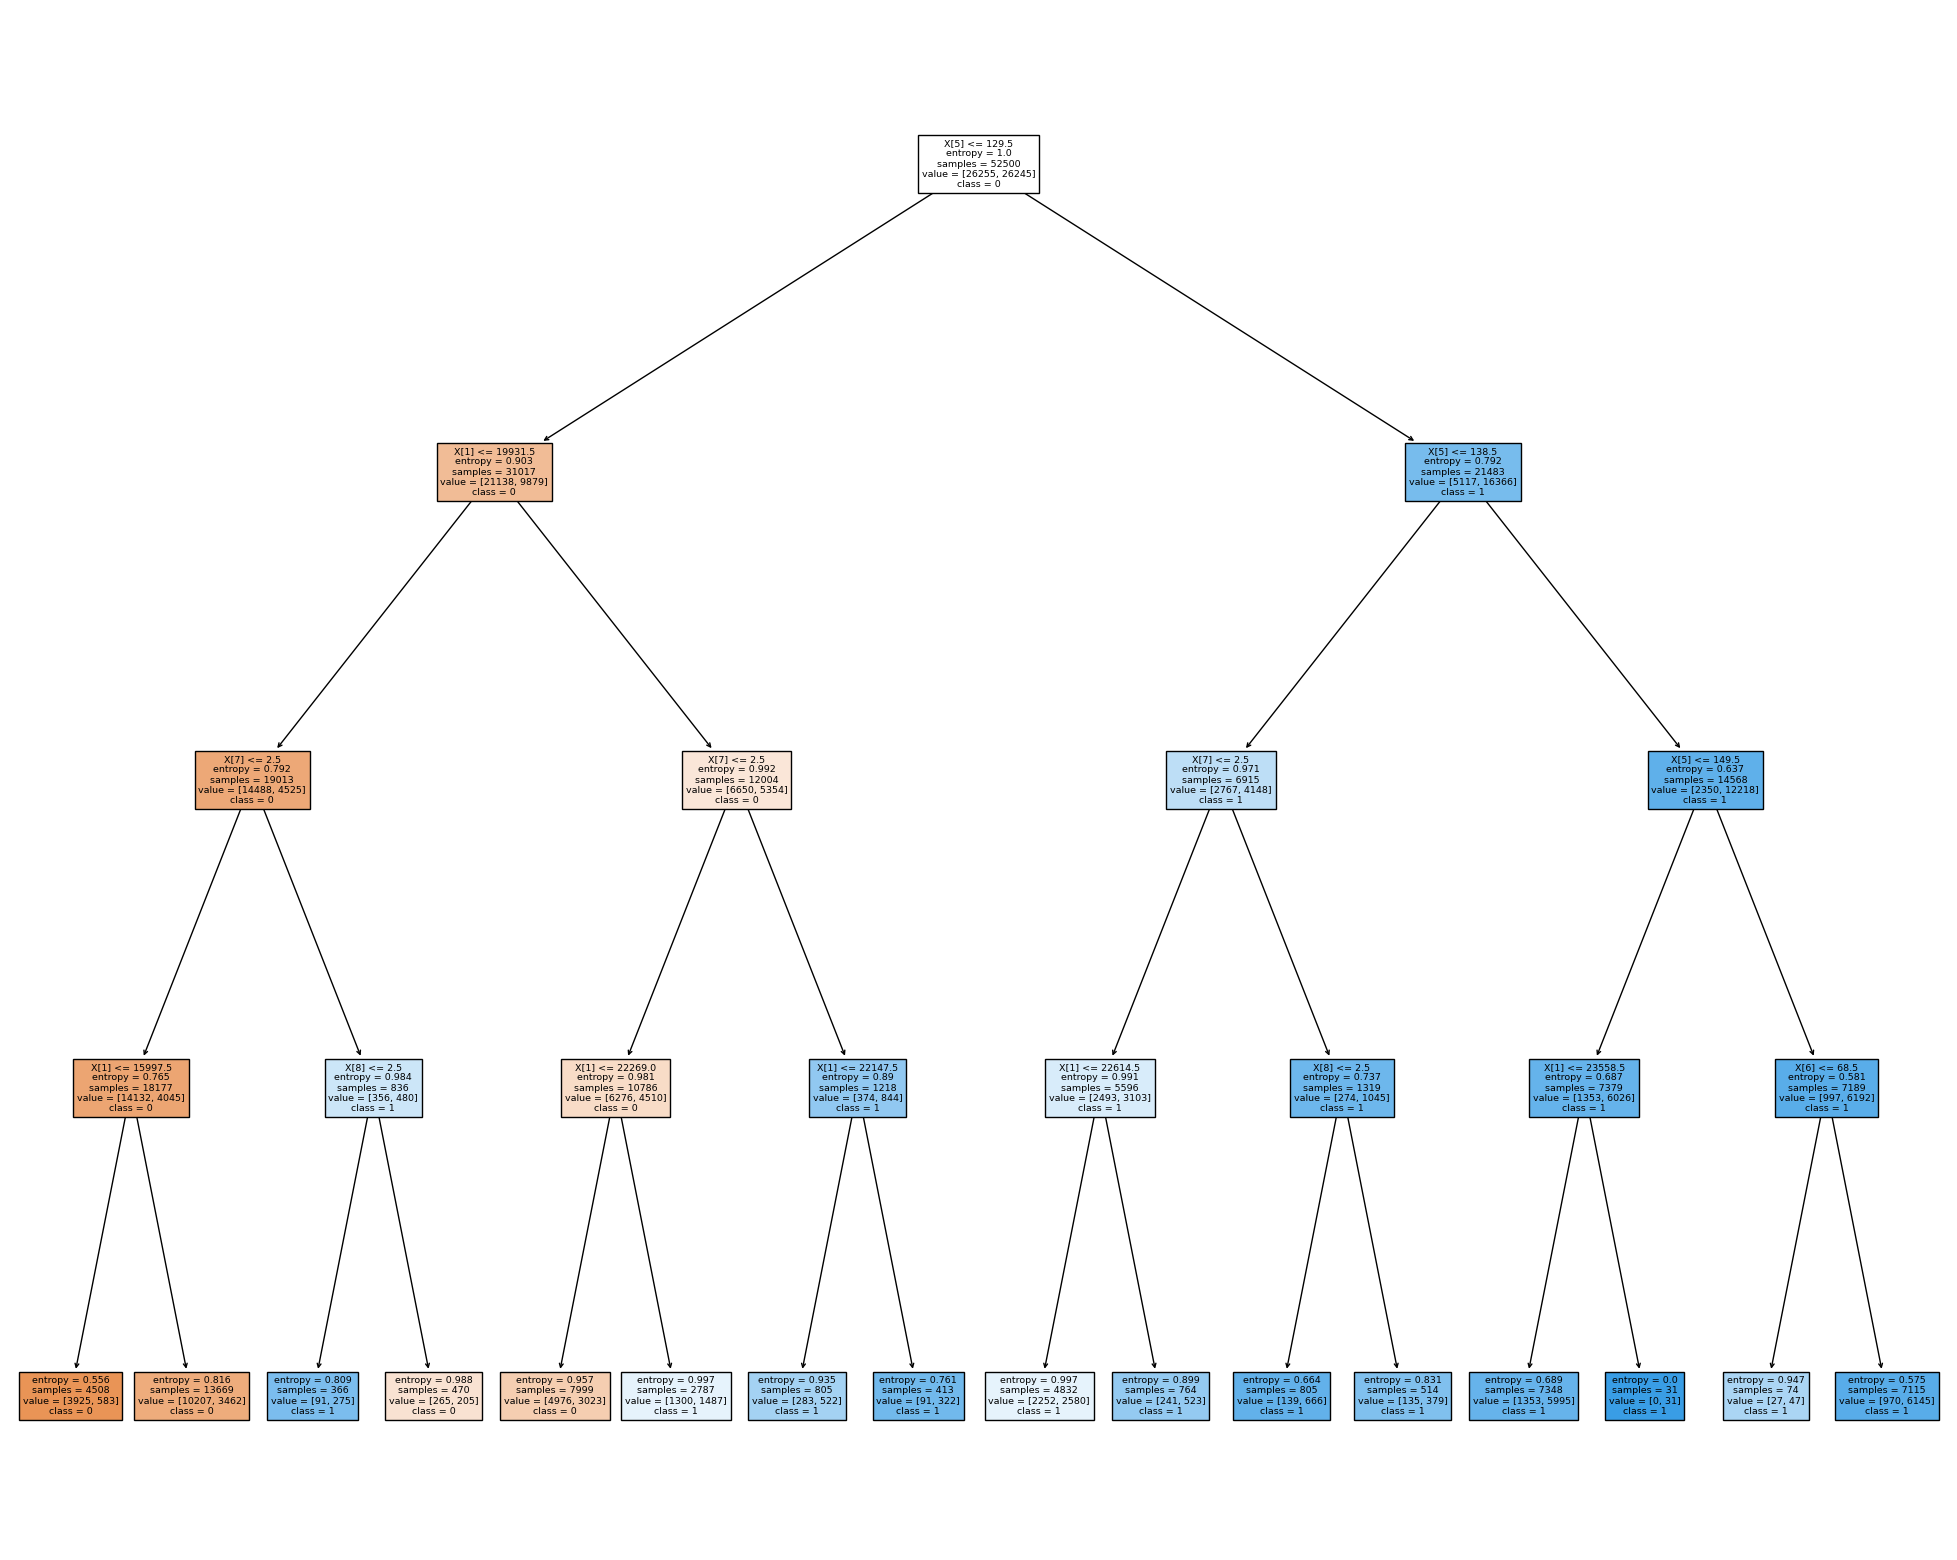

In [12]:
# 4) Calculate and print the confusion matrix of entropy (use graphics instead showing a 2D array), and the classification Report (includes: precision, recall, f1-score, and support. [2 points] 
# 5) Print the decision tree visualization of entropy with depth of 4.  [5 points]
dec_tree1 = DecisionTreeClassifier(criterion='entropy', max_depth=4)
dec_tree1 = dec_tree1.fit(train_X,train_y)
predictions = dec_tree1.predict(test_X)
print('Accuracy:',metrics.accuracy_score(test_y, predictions))
plot_confusion_matrix(dec_tree1, test_X, test_y)  
plt.show()
print(classification_report(test_y,predictions))
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dec_tree1,class_names=list(map(str,data['cardio'].values)),
                   filled=True)

Accuracy: 0.7272


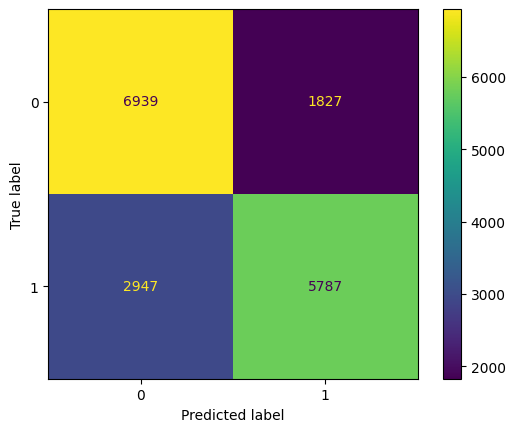

              precision    recall  f1-score   support

           0       0.70      0.79      0.74      8766
           1       0.76      0.66      0.71      8734

    accuracy                           0.73     17500
   macro avg       0.73      0.73      0.73     17500
weighted avg       0.73      0.73      0.73     17500



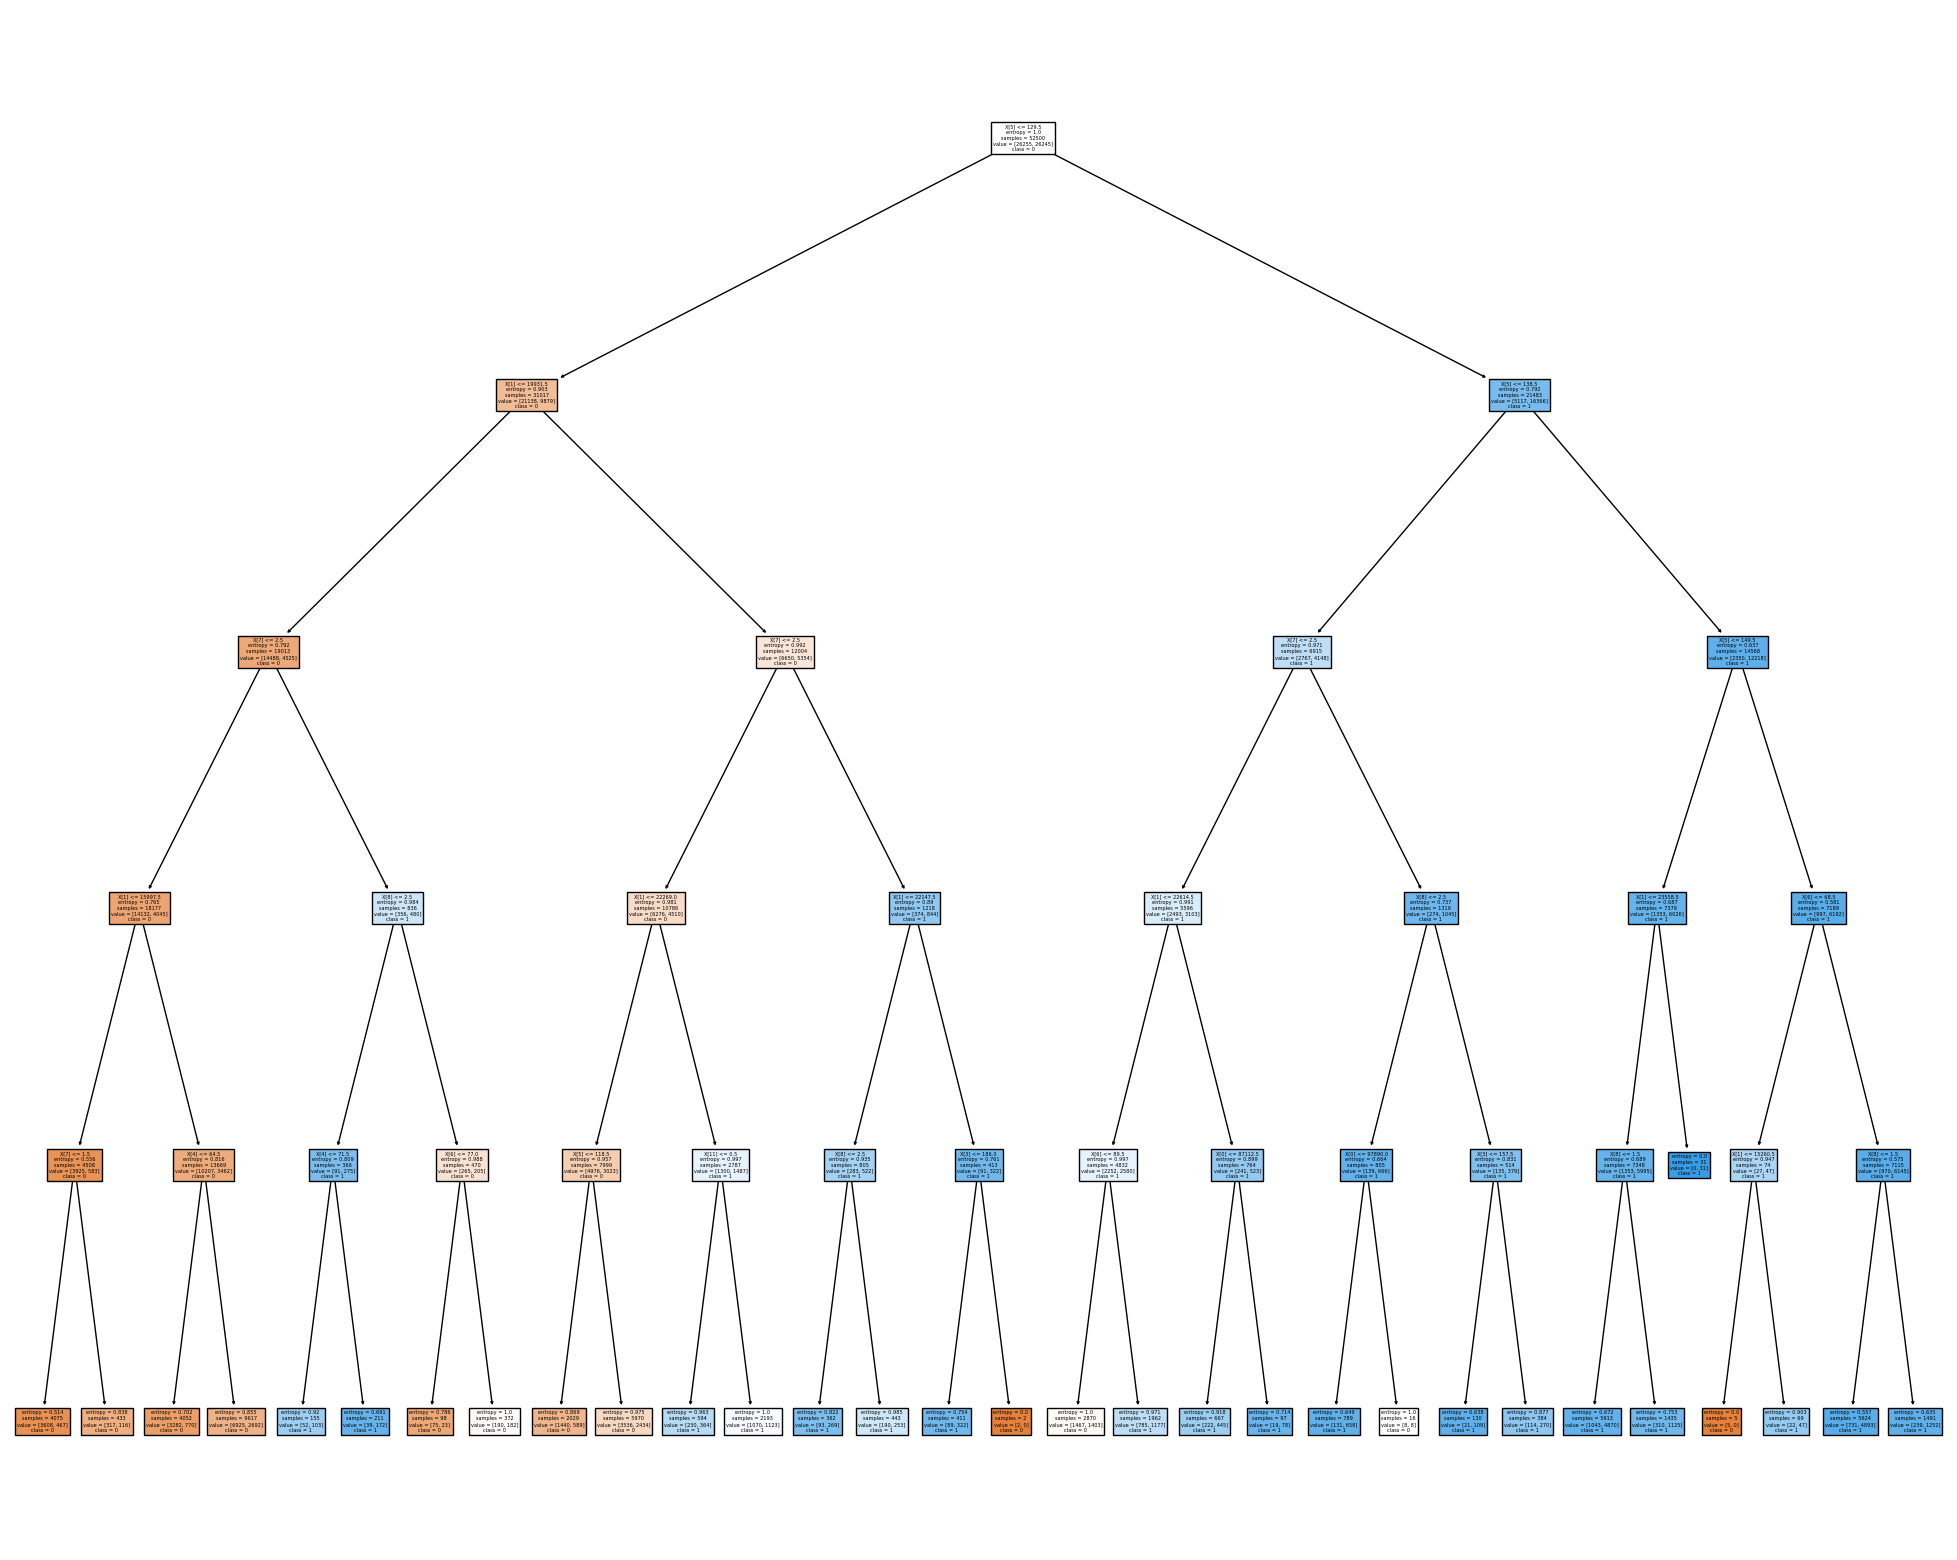

In [13]:
# 4) Calculate and print the confusion matrix of entropy (use graphics instead showing a 2D array), and the classification Report (includes: precision, recall, f1-score, and support. [2 points] 
# 5) Print the decision tree visualization of entropy with depth of 5.  [5 points]
dec_tree1 = DecisionTreeClassifier(criterion='entropy', max_depth=5)
dec_tree1 = dec_tree1.fit(train_X,train_y)
predictions = dec_tree1.predict(test_X)
print('Accuracy:',metrics.accuracy_score(test_y, predictions))
plot_confusion_matrix(dec_tree1, test_X, test_y)  
plt.show()
print(classification_report(test_y,predictions))
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dec_tree1,class_names=list(map(str,data['cardio'].values)),
                   filled=True)

# Naive Bayes (8 Points)


1) Use Naive bayes classifier (Gaussian) to predictionict the test data[5 point] 


2) Use comments to explain your code and variable names[1 point]


3) Calculate and print the confusion matrix (use graphics instead showing a 2D array), and the classification Report (includes: precision, recall, f1-score, and support).  [2 points]

In [14]:
# importing the important libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn import metrics
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [15]:
# Creation of Gaussian Classifier and training the model using the traning sets
gauss_nb = GaussianNB()
gauss_nb.fit(train_X, train_y)

# Predicting the test data and finding the accuracy 
predictions = gauss_nb.predict(test_X)
print("Accuracy:",metrics.accuracy_score(test_y, predictions))


Accuracy: 0.5630857142857143


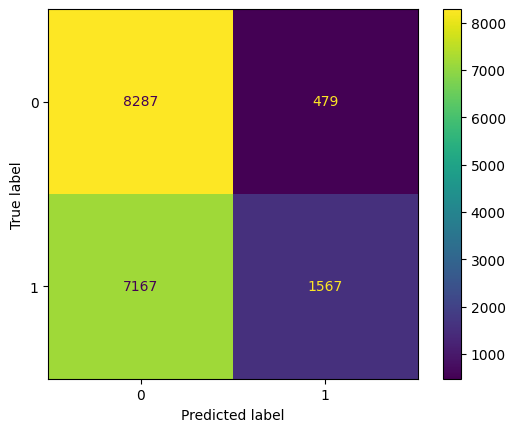

'              precision    recall  f1-score   support\n\n           0       0.54      0.95      0.68      8766\n           1       0.77      0.18      0.29      8734\n\n    accuracy                           0.56     17500\n   macro avg       0.65      0.56      0.49     17500\nweighted avg       0.65      0.56      0.49     17500\n'

In [16]:
# Calculating and printing the confussion matrix and Classification Report
plot_confusion_matrix(gauss_nb, test_X, test_y)  
plt.show()
classification_report(test_y,predictions)

## Report (17 Points)

1) Describe the Decision Tree methods, and Naive Bayes classifier. Dont copy paste it from the internet. Write it on your own.  [4 points]

2) Describe the datasets [3 points]  like what do you understand from the dataset? and remember to write down your observation for pre-processing. [2 points]

4) Visualization of the decision tree for gini and entropy.[4 points]

5) Interpret your results, compare gini and entropy. [1 points]

6) Compare the results of DT(gini), DT(entropy) and Naive Bayes. [2 points]

7) Visualize the dataset, for the target variable - 2 graphs [4 points]

Do not to forget to cite your sources!

## Programming Assignment Submission Instructions (2 Points)

### Each file should be submitted separately, do not compress them

For Decision Tree and Naive Bayes:
1.	'yourLastName_Last4digitsofyourID_DT.ipynb' (Report in markdown cells and code in code cells of Notebook preferred)
2.	Report in PDF (optional)

For Nearest Neighbor:
1.	'yourLastName_Last4digitsofyourID_NN.ipynb' (Report in markdown cells and code in code cells of Notebook preferred)
2.	Report in PDF (optional)

### <b>Please consult the TA before using any other packages apart from sklearn,numpy,pandas, matplotlib and seaborn<b>